# K-Means-Clustering

## Datensatz

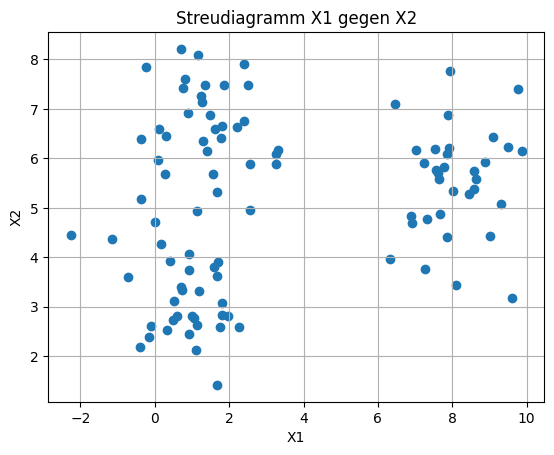

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Festlegen der Anzahl der Datenpunkte und Features
num_points = 100  # Anzahl der Datenpunkte
k = 3  # Annahme von 3 Clustern für Variation in den Daten

# Zufällige Zentren für die Cluster generieren
np.random.seed(999)
centers = np.random.rand(k, 2) * 10  # Multiplikator skaliert die Zufallszahlen

# Datenpunkte um die Zentren herum generieren
data = []
for i in range(k):
    # Erzeugen von Punkten um jedes Zentrum mit normalverteilter Streuung
    points = np.random.randn(num_points // k, 2) + centers[i]
    data.append(points)

# Umwandeln der Liste von Arrays in ein einzelnes Array
data = np.vstack(data)

# Konvertierung in einen DataFrame
df = pd.DataFrame(data, columns=['X1', 'X2'])

plt.scatter(df['X1'], df['X2'])
plt.title('Streudiagramm X1 gegen X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

## Zentroide auswählen

In [2]:
initial_centroids = df.sample(n=k, random_state=99).reset_index(drop=True)

## In Cluster sortieren

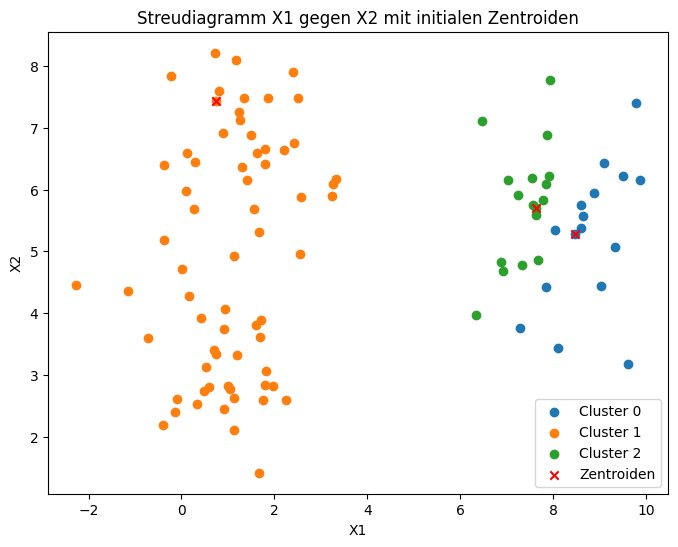

In [3]:
def calculate_distance(point, centroid):
    return np.sqrt((point['X1'] - centroid['X1'])**2 + (point['X2'] - centroid['X2'])**2)

# Initialisiere eine neue Spalte im DataFrame zur Speicherung des zugeordneten Clusters
df['Cluster'] = -1

# Für jeden Datenpunkt den nächstgelegenen Zentroiden finden
for index, point in df.iterrows():
    # Berechne die Distanzen zu allen Zentroiden
    distances = initial_centroids.apply(lambda centroid: calculate_distance(point, centroid), axis=1)
    # Finde den Index des Zentroiden mit der kleinsten Distanz
    closest_centroid_index = distances.idxmin()
    # Weise den Cluster des nächsten Zentroiden zu
    df.at[index, 'Cluster'] = closest_centroid_index

# Ergebnisse anzeigen
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['X1'], cluster_data['X2'], label=f'Cluster {i}')
plt.scatter(initial_centroids['X1'], initial_centroids['X2'], color='red', label='Zentroiden', marker='x')
plt.title('Streudiagramm X1 gegen X2 mit initialen Zentroiden')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Rekursiv Zentroide aktualisieren und Distanzen neu berechnen

In [4]:
def update_centroids(df, k):
    new_centroids = []
    for i in range(k):
        cluster_group = df[df['Cluster'] == i]
        # Berechne den neuen Zentroiden als den Mittelwert der Punkte in diesem Cluster
        new_centroid = cluster_group[['X1', 'X2']].mean()
        new_centroids.append(new_centroid)
    # Verwende concat statt append, um die Liste von Series in einen DataFrame umzuwandeln
    new_centroids_df = pd.concat(new_centroids, axis=1).transpose().reset_index(drop=True)
    return new_centroids_df

# Maximal erlaubte Iterationen
max_iterations = 10
iterations = 0

while True:
    # Initialisiere die Cluster-Zuweisungen
    df['Cluster'] = -1

    # Berechne für jeden Datenpunkt den nächsten Zentroiden
    for index, point in df.iterrows():
        distances = initial_centroids.apply(lambda centroid: calculate_distance(point, centroid), axis=1)
        closest_centroid_index = distances.idxmin()
        df.at[index, 'Cluster'] = closest_centroid_index

    # Aktualisiere die Zentroiden
    new_centroids = update_centroids(df, k)

    # Überprüfe die Konvergenz: Wenn sich die Zentroiden nicht ändern, stoppe den Algorithmus
    if new_centroids.equals(initial_centroids):
        print("Konvergenz erreicht nach", iterations, "Iterationen.")
        break
    else:
        initial_centroids = new_centroids
        iterations += 1
        if iterations >= max_iterations:
            print("Maximale Iterationen erreicht.")
            break


Konvergenz erreicht nach 3 Iterationen.


          X1        X2  Cluster
0   9.600548  3.183853        0
1   9.490608  6.220516        0
2   7.634079  5.590450        2
3   6.924220  4.690401        2
4   7.845871  6.088247        2
..       ...       ...      ...
94  1.701468  3.896081        1
95  1.185567  3.319457        1
96  1.808461  3.069730        1
97 -2.262508  4.456129        1
98  1.044878  2.768379        1

[99 rows x 3 columns]
Endgültige Zentroiden:
         X1        X2
0  9.034191  5.404966
1  1.087600  4.931452
2  7.437507  5.592131


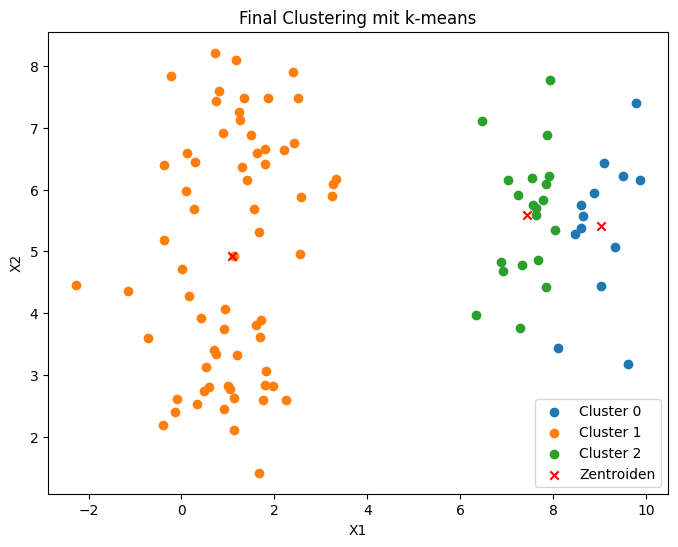

In [5]:
# Ergebnisse anzeigen
print(df)
print("Endgültige Zentroiden:")
print(initial_centroids)

# Visualisierung der Cluster und Zentroiden
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['X1'], cluster_data['X2'], label=f'Cluster {i}')
plt.scatter(initial_centroids['X1'], initial_centroids['X2'], color='red', label='Zentroiden', marker='x')
plt.title('Final Clustering mit k-means')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
